# How to run a reference design

In this example, we will demonstrate how to setup and run one of the reference designs. We will also show how to explore outputs and generate plots.

### Import required modules

We begin by importing the necessary modules.


In [1]:
from greenheart.simulation.greenheart_simulation import GreenHeartSimulationConfig
from greenheart.tools.optimization.gc_run_greenheart import run_greenheart
from greenheart.tools.plot import plot_energy_flows, plot_hydrogen_flows

/home/cbay/ReferenceHybridSystemDesigns/examples/log/hybrid_systems_2025-03-24T04.24.18.771056.log


### Load inputs and configure the simulation

Next we will configure the H2Integrate simulation by loading individual yaml input files and combining the necessary config definitions and variable options into one `config` variable to run H2Integrate.

In [2]:
filename_turbine_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/turbines/ATB2024_6MW_170RD_floris_turbine.yaml"
filename_floris_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/floris/floris_input_lbw_6MW.yaml"
filename_hopp_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/plant/hopp_config_mn.yaml"
filename_greenheart_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/plant/greenheart_config_onshore_mn.yaml"

config = GreenHeartSimulationConfig(
    filename_hopp_config,
    filename_greenheart_config,
    filename_turbine_config,
    filename_floris_config,
    verbose=True,
    show_plots=False,
    save_plots=True,
    use_profast=True,
    post_processing=True,
    incentive_option=1,
    plant_design_scenario=1,
    output_level=8,
    save_greenheart_output=True,
)


Turbine configuration:
turbine_type :  ATB2024_6MW_170RD
hub_height :  115.0
rotor_diameter :  170.0
TSR :  9.0
operation_model :  cosine-loss
turbine_rating :  6
power_thrust_table :  {'ref_air_density': 1.225, 'ref_tilt': 6.0, 'cosine_loss_exponent_yaw': 1.88, 'cosine_loss_exponent_tilt': 1.88, 'wind_speed': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0], 'power': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 228.52969636356403, 376.7496812611624, 580.9895384603997, 822.2288514721866, 1090.2170442095946, 1409.7828977663846, 1805.0803149166634, 2262.4843738118716, 2769.470201641793, 3355.6919968523225, 4026.7774705618813, 4650.06941568721, 5101.383194069271, 5428.709499847277, 5699.338168029099, 5885.580167578582, 5957.320816531514, 5969.721374482352, 5983.7

### Run the H2Integrate simulation

Now we will pass the config to H2Integrate and run the reference plant.

/home/cbay/anaconda3/envs/refdesign/lib/python3.11/site-packages/openmdao/core/driver.py:769: OpenMDAOWarning:Driver: No matches for pattern '*_df' in recording_options['excludes'].


FLORIS is the system model...

Plotting Wind Resource


Simulating wind farm output in FLORIS...

HOPP Results
Hybrid Annual Energy: {"pv": 1254836132.6456678, "wind": 3258737721.4294705, "battery": -2139814.7804178623, "hybrid": 4511434039.2947235}
Capacity factors: {"pv": 23.277496752844865, "wind": 40.00021752626148, "battery": 0, "hybrid": 31.148462431074197}
Real LCOE from HOPP: {"pv": 6.698111940591575, "wind": 3.5002410969939968, "battery": 17.903331405213493, "hybrid": 4.5765197033520995}
Took 0.036 sec to run the create clusters
Took 0.029 sec to run even_split_power function
Took 0.397 sec to run the RUN function

Electrolyzer Physics:
H2 Produced Annually (metric tons):  77078.85047773815
Max H2 hourly (metric tons):  14.118193433334325
Max H2 daily (metric tons):  338.7860183506397
Energy to electrolyzer (kWh):  4511313802.768745
Energy per kg (kWh/kg):  56.14756176808234
Max hourly based on est kg/kWh (kg):  28386.23195543275
Max daily rough est (metric tons):  509.2275175

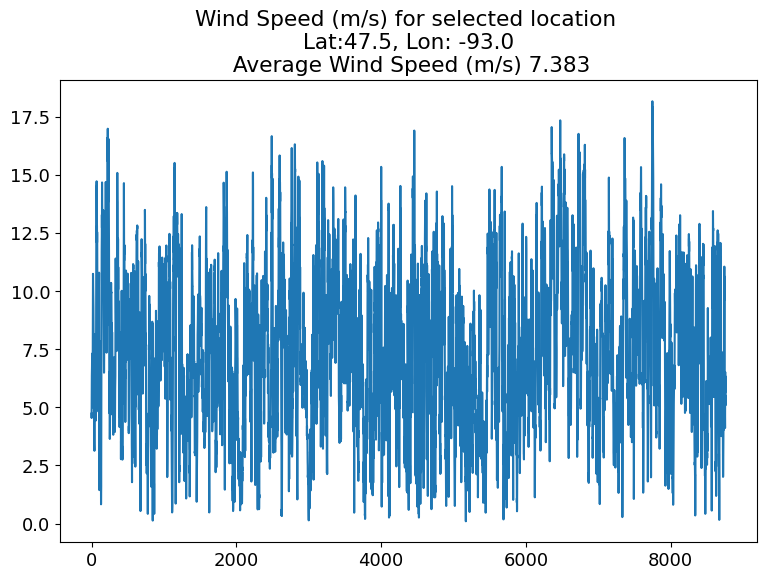

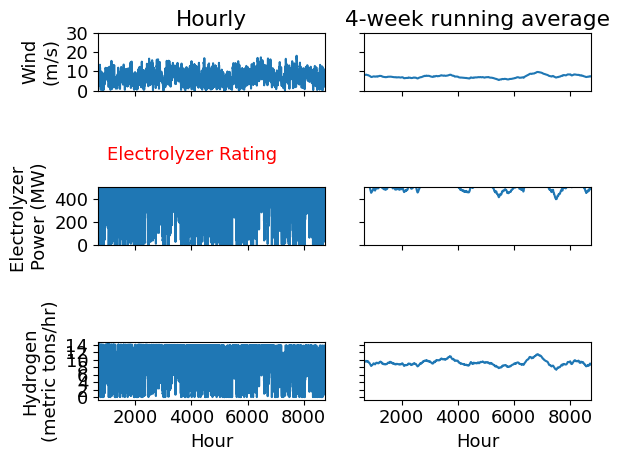

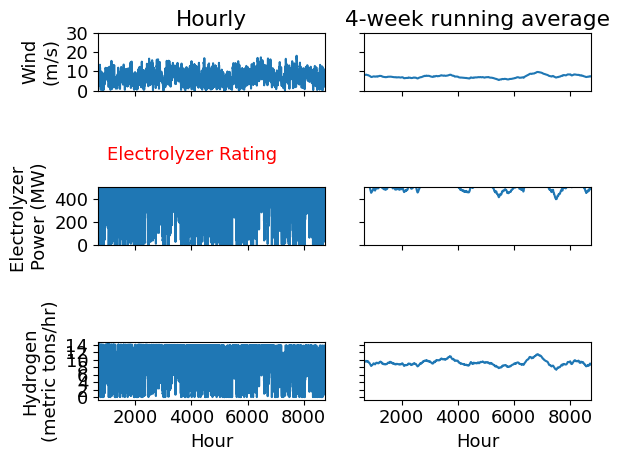

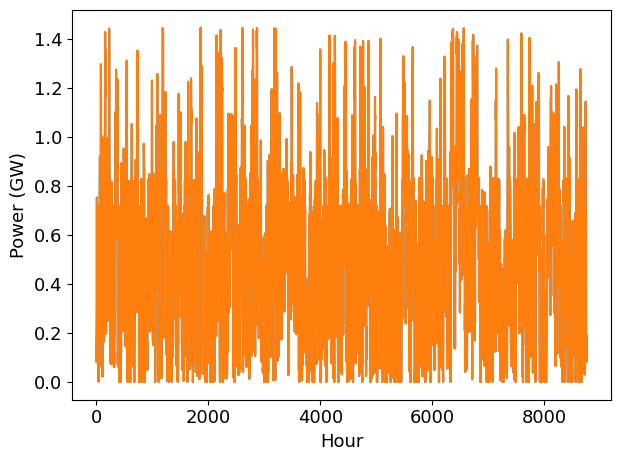

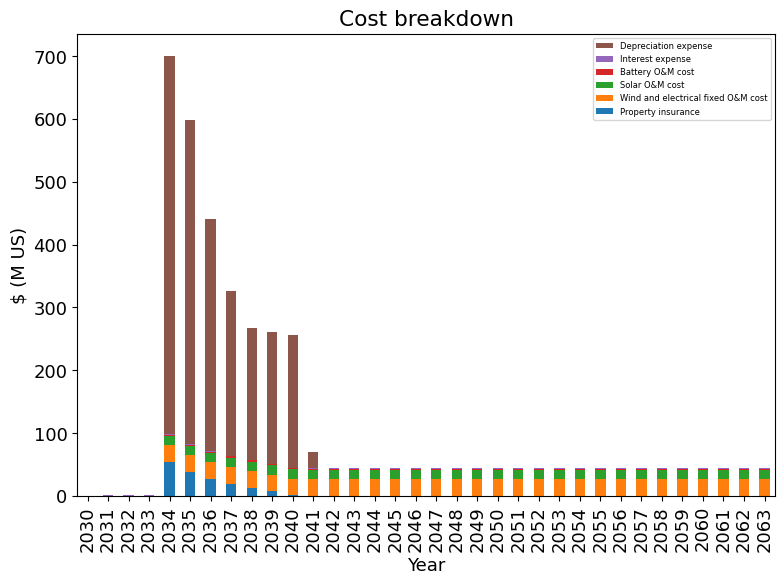

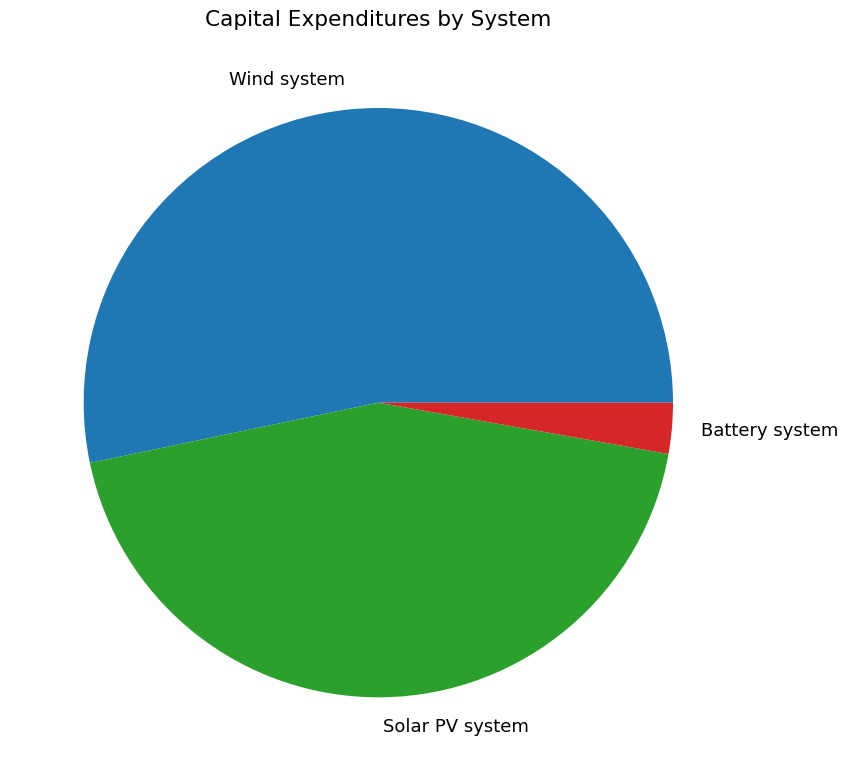

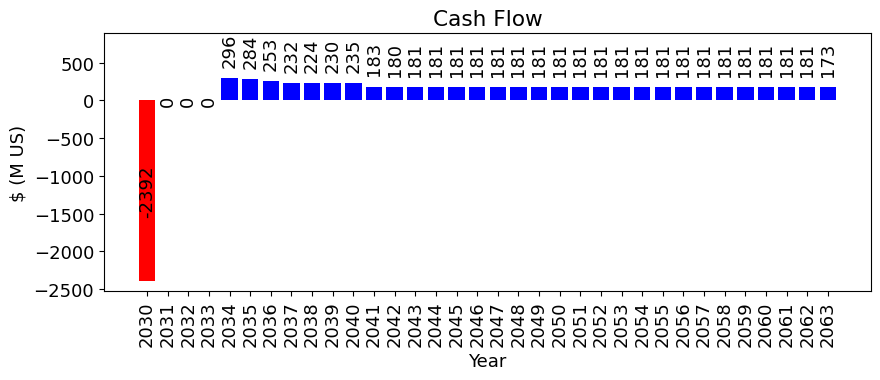

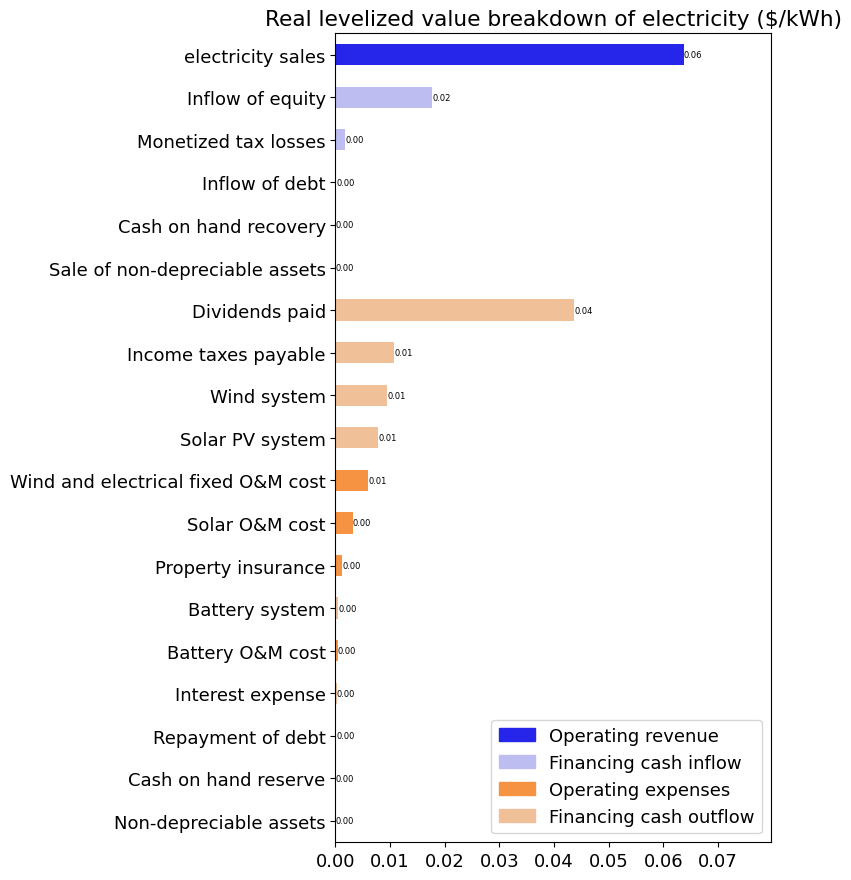

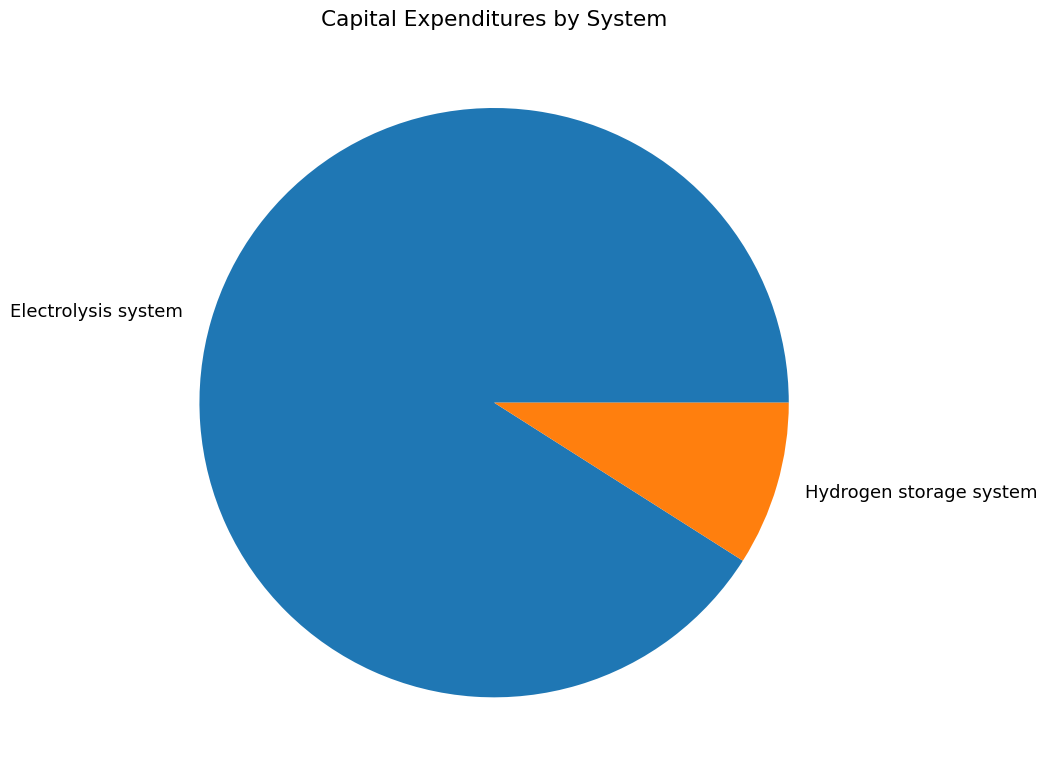

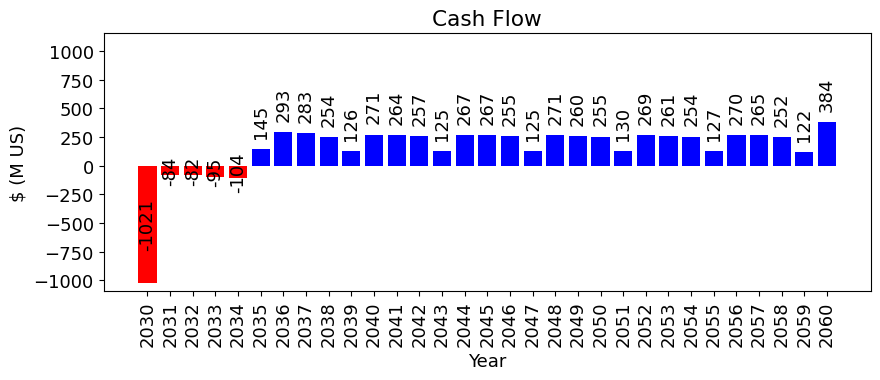

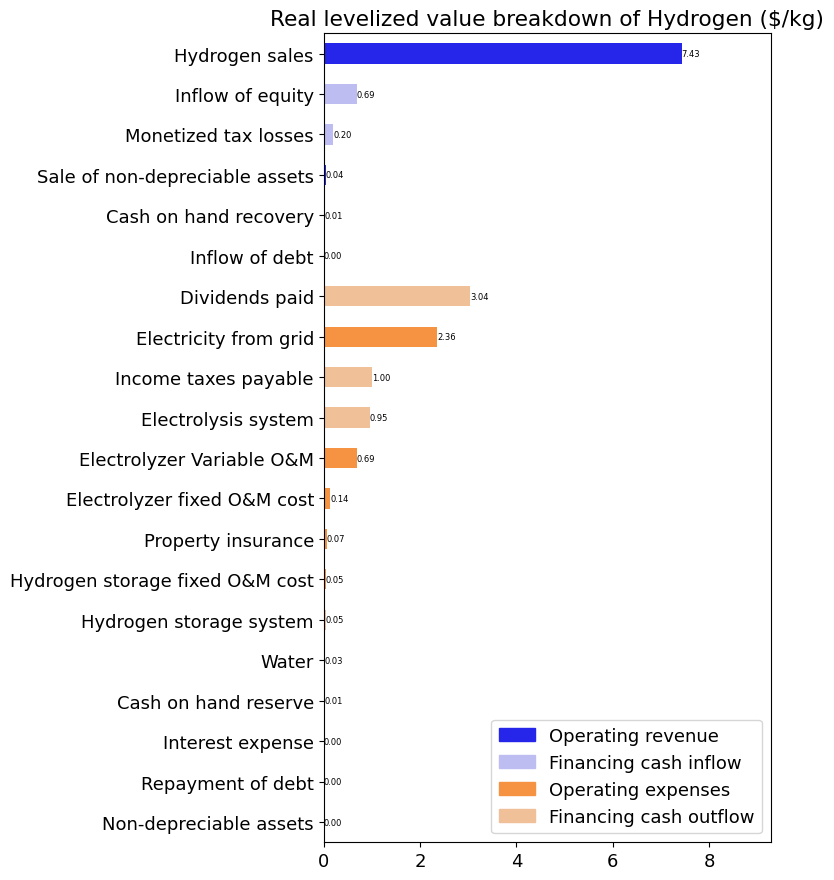

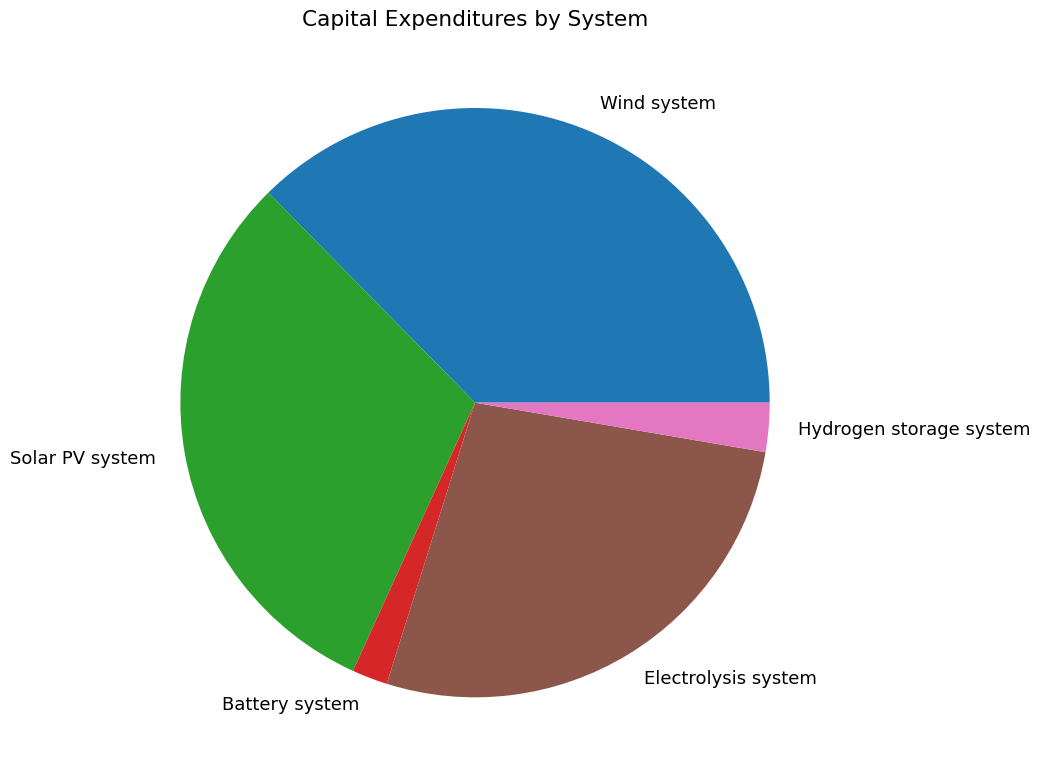

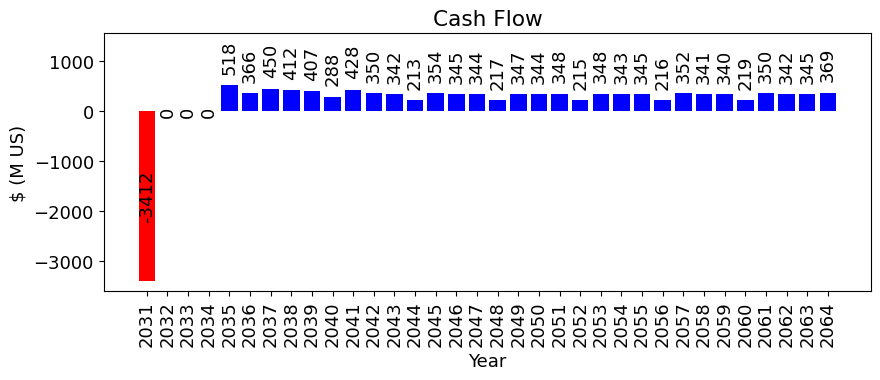

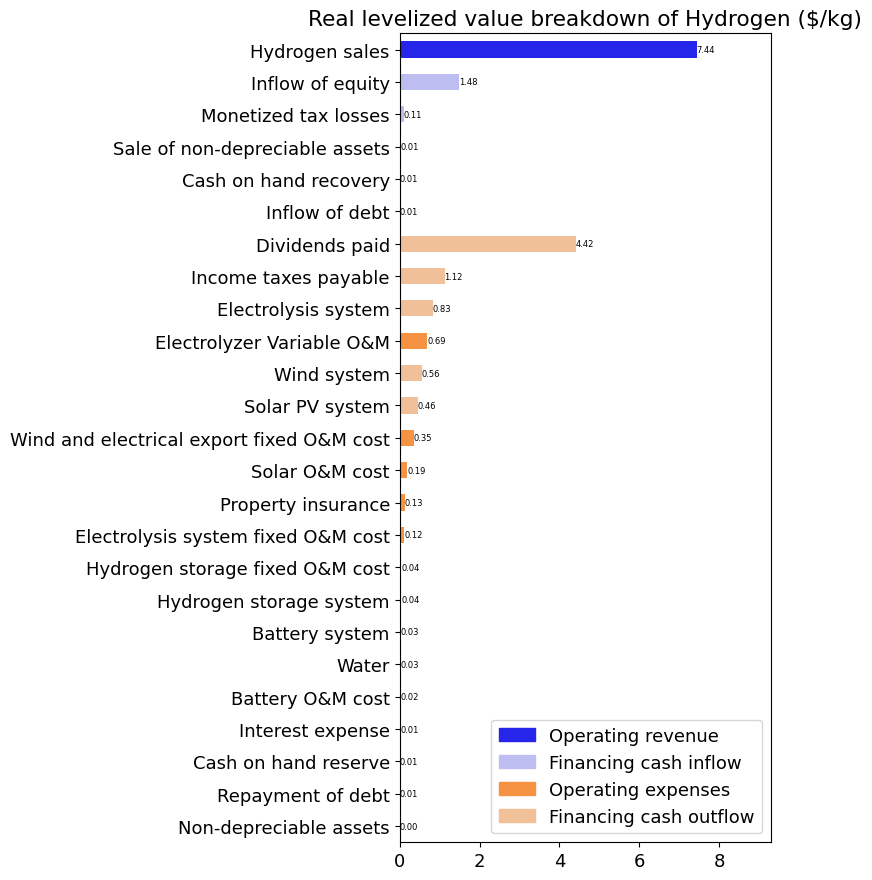

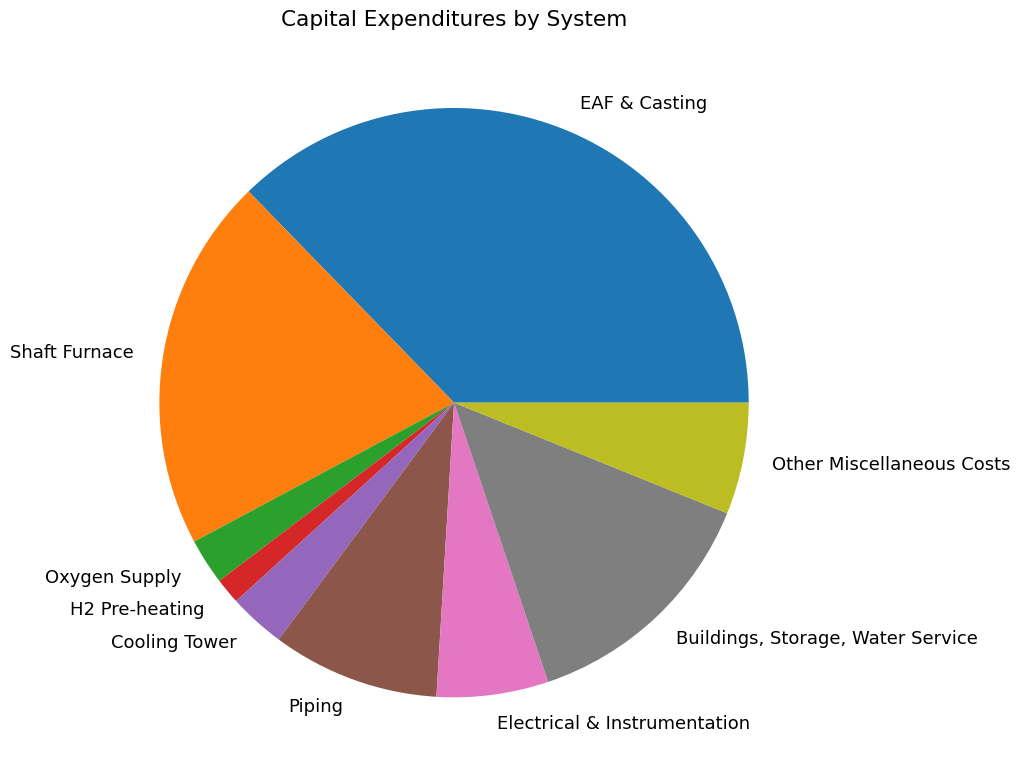

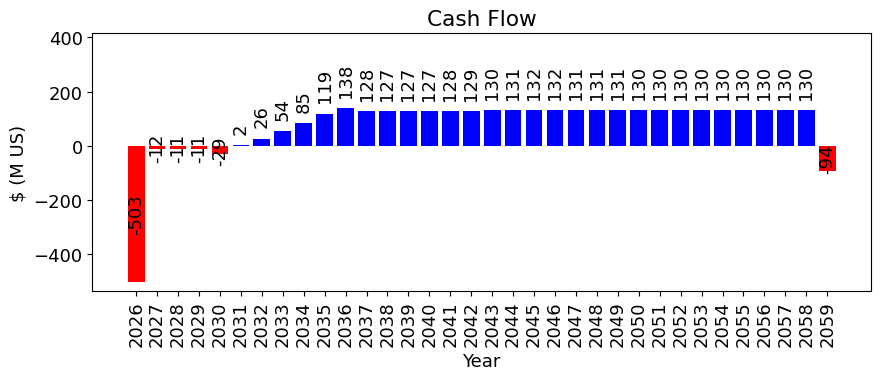

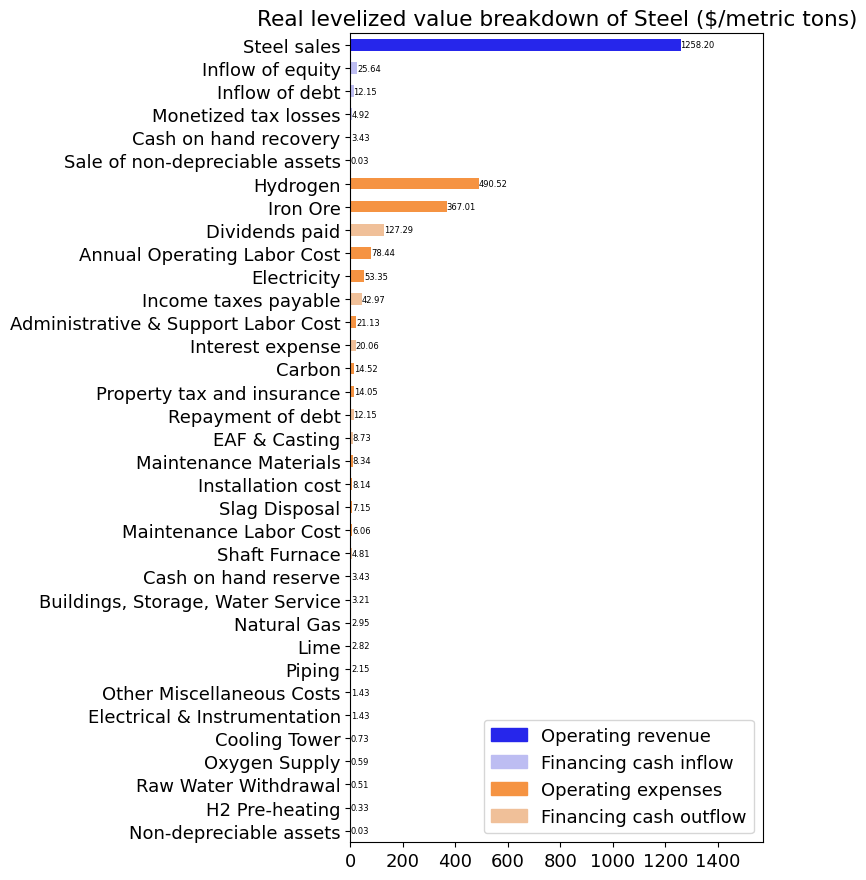

In [3]:
prob, config = run_greenheart(config, run_only=True)

### Inspect outputs and generate plots

We can easily get relavant outputs from H2Integrate, such as LCOE, LCOH, and LCOS for this example.

In [4]:
lcoe = prob.get_val("lcoe", units="USD/(MW*h)")
lcoh = prob.get_val("lcoh", units="USD/kg")
lcos = prob.get_val("lcos", units="USD/t")

print("LCOE: ", lcoe, "[$/MWh]")
print("LCOH: ", lcoh, "[$/kg]")
print("LCOS: ", lcos, "[$/metric-tonne]")

LCOE:  [63.78099318] [$/MWh]
LCOH:  [7.43659637] [$/kg]
LCOS:  [1258.19511633] [$/metric-tonne]


We can also generate plots using built-in functions from H2Integrate.

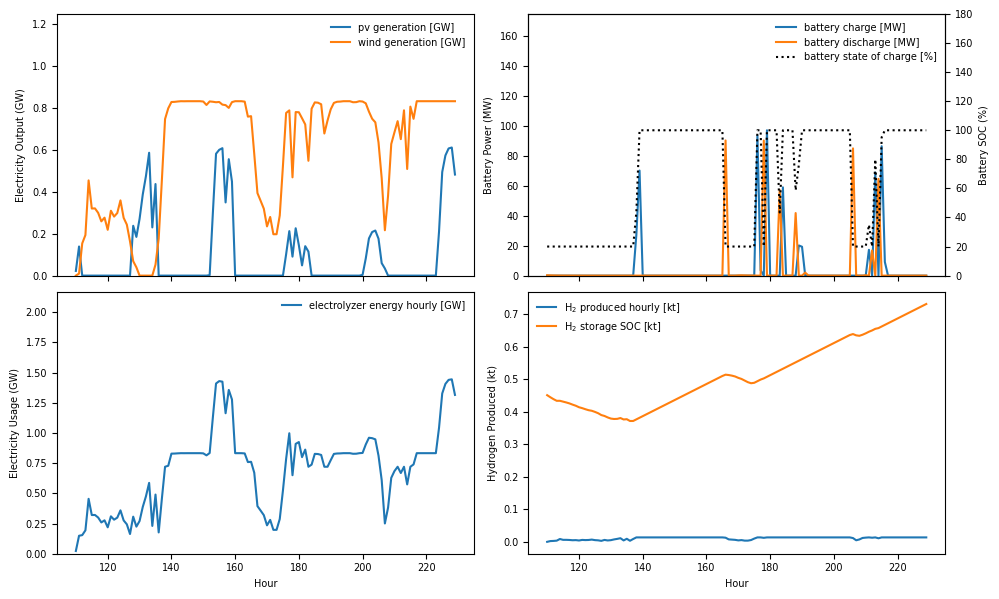

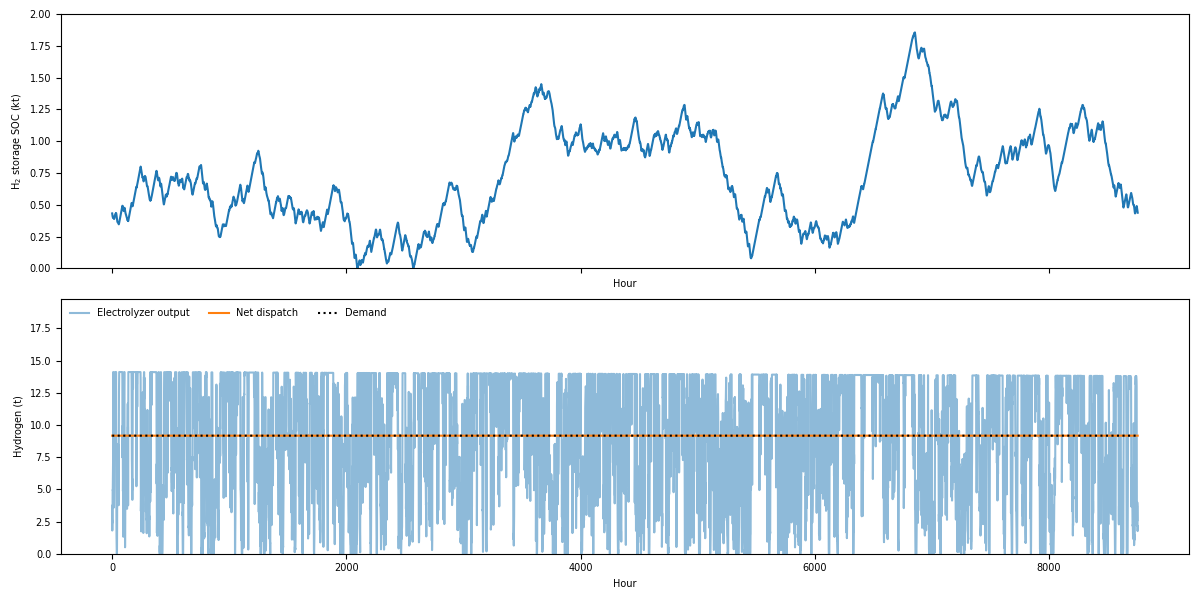

In [5]:
plot_energy_flows("./output/data/production/energy_flows.csv", show_fig=True)
plot_hydrogen_flows("./output/data/production/energy_flows.csv", show_fig=True)